In [82]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input

import matplotlib.pyplot as plt

In [83]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [84]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [85]:
def showImg(img):
    if img.shape[0] != 28 or img.shape[1] != 28:
        img = img.reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

In [86]:
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

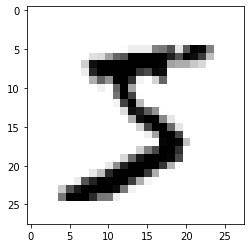

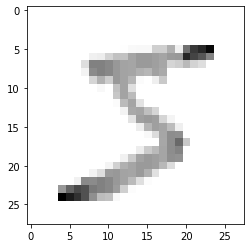

In [87]:
showImg(x_train[0])
showImg(x_train_norm[0])

In [88]:
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [89]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [90]:
x_train_norm.shape

(60000, 28, 28)

In [91]:
28*28

784

In [92]:
# x_train_norm = x_train_norm.reshape(-1, 28, 28, 1)
# x_test_norm = x_test_norm.reshape(-1, 28, 28, 1)

In [93]:
# x_train_norm = x_train_norm.reshape(60000, 28*28)
# 28 * 28 = 784

In [94]:
model = Sequential()
model.add(Flatten())
# model = model.add(Dense(500, input_dim=28*28*3))
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("sigmoid"))

In [95]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [96]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 3.6744 - accuracy: 0.1050
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6242 - accuracy: 0.0990
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.4630 - accuracy: 0.0988


In [97]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_25 (Dense)             (32, 500)                 392500    
_________________________________________________________________
activation_24 (Activation)   (32, 500)                 0         
_________________________________________________________________
dropout_18 (Dropout)         (32, 500)                 0         
_________________________________________________________________
dense_26 (Dense)             (32, 256)                 128256    
_________________________________________________________________
activation_25 (Activation)   (32, 256)                 0         
_________________________________________________________________
dropout_19 (Dropout)         (32, 256)                

In [98]:
_, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0980


In [99]:
accuracy

0.09799999743700027

In [101]:
x_train_norm = x_train_norm.reshape(-1, 28, 28, 1)
x_test_norm = x_test_norm.reshape(-1, 28, 28, 1)

In [102]:
model_cnn = Sequential()
model_cnn.add(Conv2D(128, (3,3), input_shape=(28,28,1)))
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64, (3,3)))
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(32, (3,3)))
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Flatten())

model_cnn.add(Dense(32))

model_cnn.add(Dense(10, activation="softmax"))

In [103]:
model_cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [106]:
model_cnn.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2338 - accuracy: 0.9272
Epoch 2/3
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0811 - accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0605 - accuracy: 0.9812


In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_24 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               128256    
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)              